In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data and fine tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Main preprocessing
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, LabelEncoder

# Deal class imbalance
from sklearn.utils.class_weight import compute_class_weight

# Target transformations
from sklearn.base import BaseEstimator, TransformerMixin

# Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, log_loss, ConfusionMatrixDisplay, classification_report

# GBT Model
from sklearn.ensemble import GradientBoostingClassifier

# Warnings ignore
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("D:\\edge\\train.csv~\\train.csv")
test_data = pd.read_csv("D:\\edge\\test.csv~\\test.csv")

In [ ]:
train_data.info()
test_data.info()

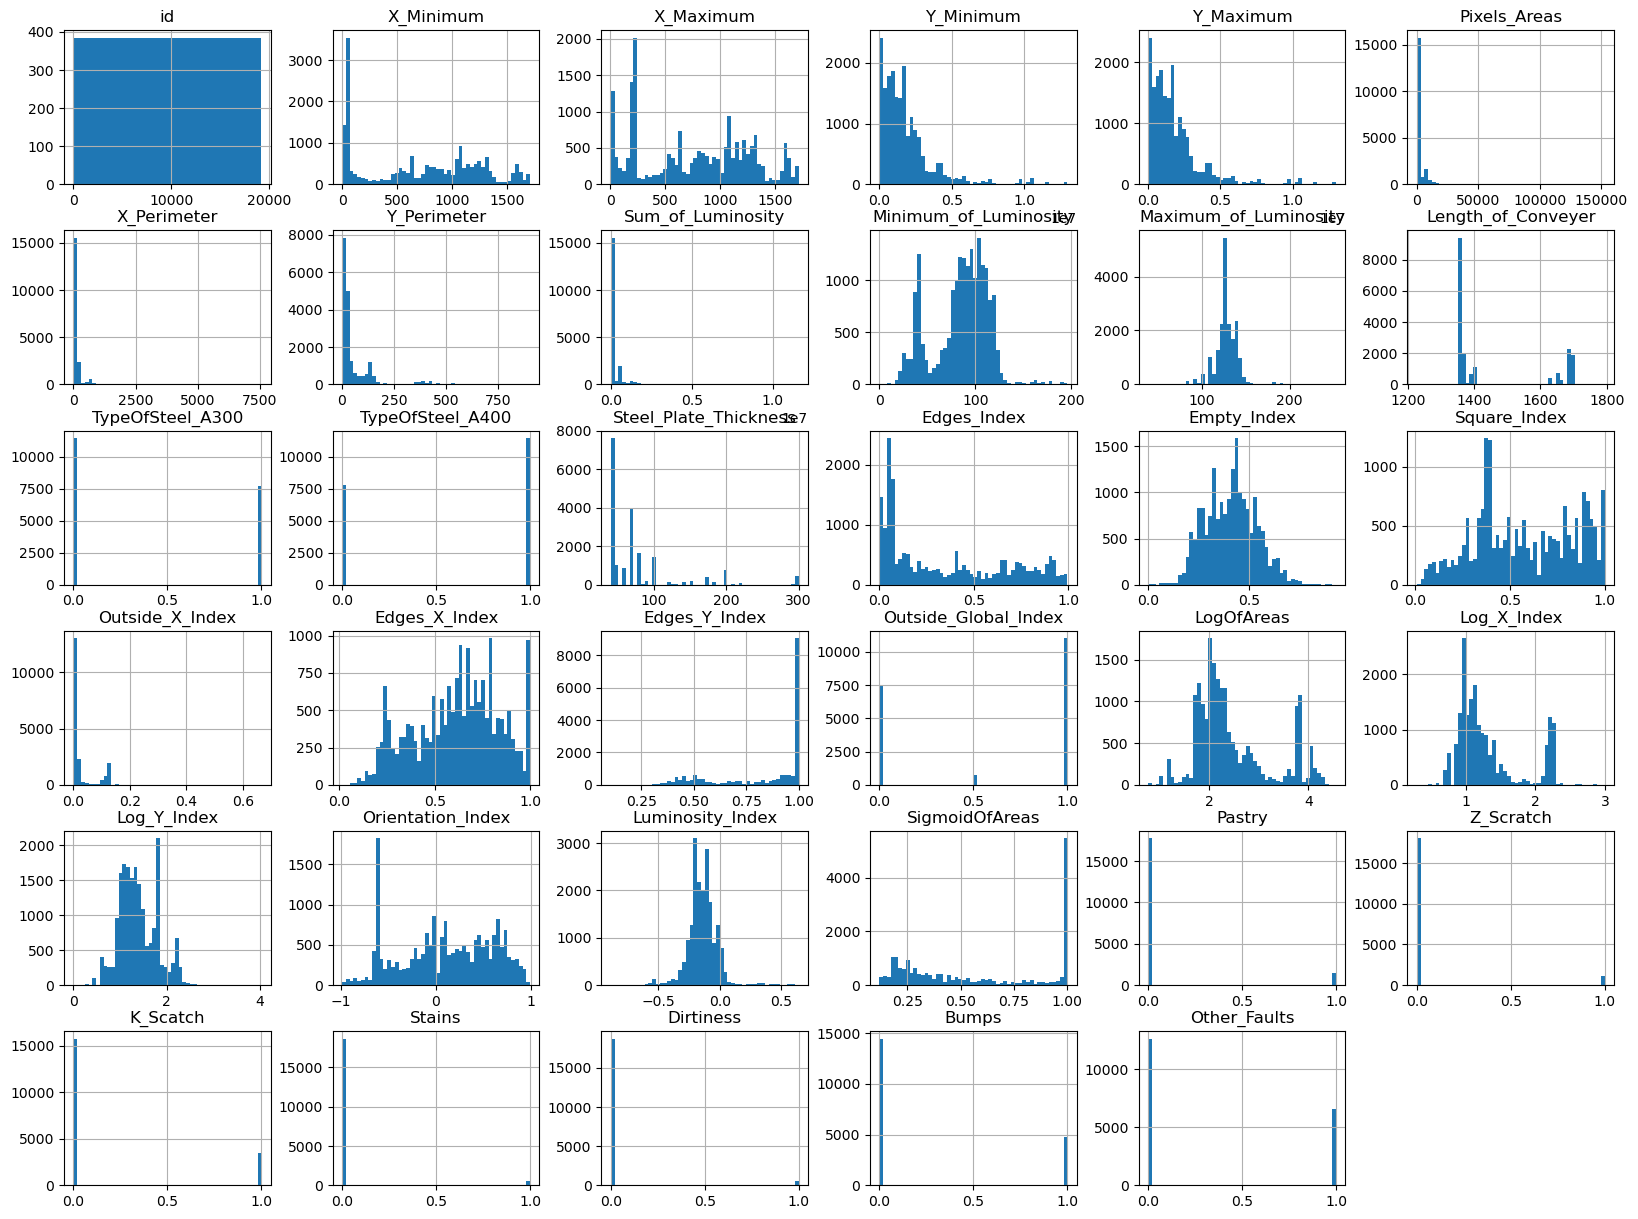

In [3]:
%matplotlib inline   
train_data.hist(bins=50, figsize=(20,15))
plt.show()

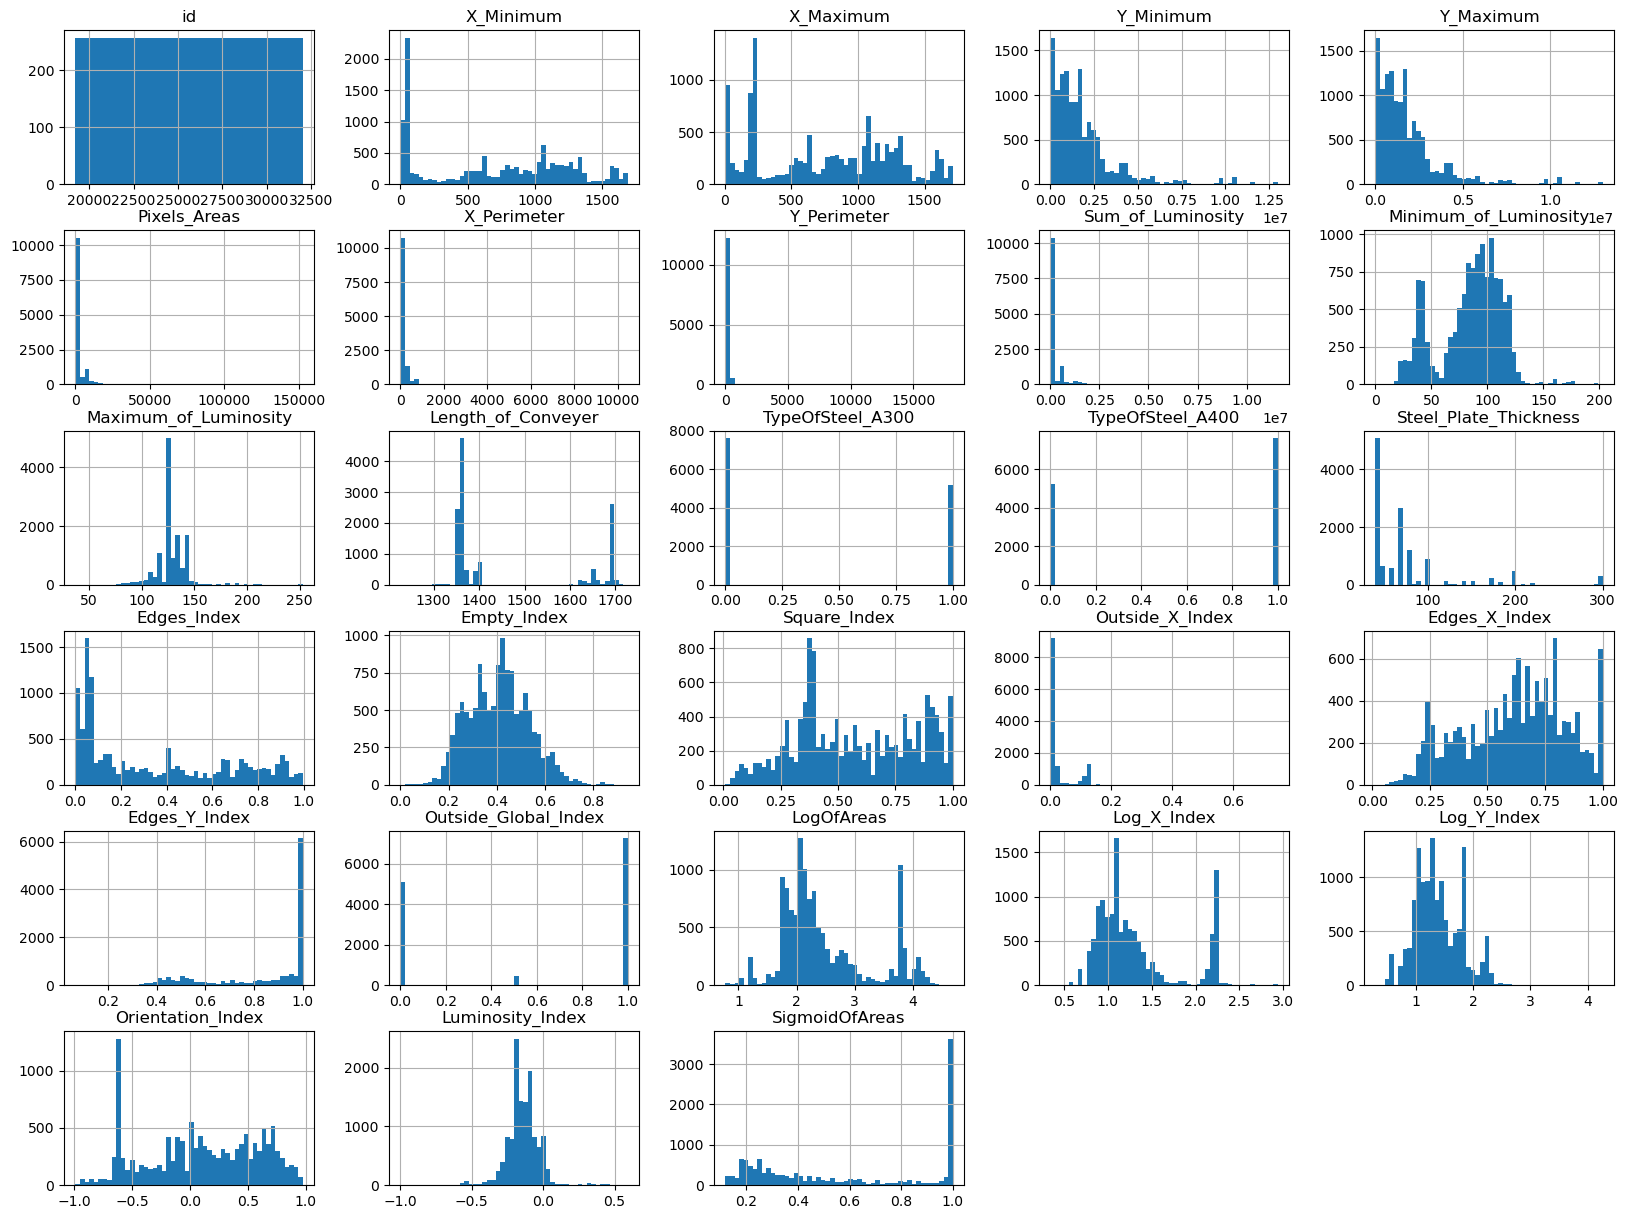

In [4]:
test_data.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
train_data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [6]:
test_data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [7]:
train_data.drop(['id'],axis=1,inplace=True)
test_data.drop(['id'],axis=1,inplace=True)o

In [8]:
target_variables = train_data.iloc[:, -7:].columns

In [9]:
X_features = train_data.drop(target_variables, axis=1)
y_targets = train_data[target_variables]

In [25]:
y_targets

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,0,0,0,0,0,0,1
19216,1,0,0,0,0,0,0
19217,0,0,0,0,0,0,1


In [10]:
label_encoded_targets = np.argmax(y_targets, axis=-1)

In [31]:
label_encoded_targets

array([3, 6, 2, ..., 0, 6, 5], dtype=int64)

In [32]:
unique_classes = np.unique(label_encoded_targets)
unique_classes

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
class_weights = compute_class_weight(class_weight="balanced", classes=unique_classes, y=label_encoded_targets)

In [13]:
class_weights_param = {key: value for key, value in zip(unique_classes, class_weights)} 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_features, label_encoded_targets, test_size=0.3, random_state=42)

In [29]:
X_train.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.989606,0.025558,0.024440,-0.459295,-0.439236,-0.420752,-0.421068,0.335158,-0.128601,...,-0.512384,0.105791,0.456729,0.223864,-0.498984,-0.525021,-0.368803,0.277805,-0.068918,-0.369064
X_Maximum,0.989606,1.000000,0.028552,0.026642,-0.386170,-0.365140,-0.348810,-0.352628,0.271930,-0.126046,...,-0.419739,0.088597,0.386913,0.191229,-0.421736,-0.441546,-0.309184,0.237031,-0.080309,-0.310741
Y_Minimum,0.025558,0.028552,1.000000,0.968921,-0.006098,-0.012744,-0.021745,-0.005472,-0.023680,-0.038479,...,0.016937,0.052674,-0.001962,-0.022216,-0.000939,0.011722,-0.019963,-0.038897,-0.031673,-0.030446
Y_Maximum,0.024440,0.026642,0.968921,1.000000,-0.006451,-0.013087,-0.022176,-0.005656,-0.023409,-0.035005,...,0.013202,0.051334,-0.000521,-0.019198,-0.000476,0.012053,-0.019597,-0.036352,-0.028476,-0.029416
Pixels_Areas,-0.459295,-0.386170,-0.006098,-0.006451,1.000000,0.814868,0.830098,0.787651,-0.620524,0.121857,...,0.757390,-0.297414,-0.651458,-0.214779,0.771820,0.747360,0.639261,-0.271794,-0.018519,0.541322
X_Perimeter,-0.439236,-0.365140,-0.012744,-0.013087,0.814868,1.000000,0.896883,0.775366,-0.591483,0.148159,...,0.736829,-0.370593,-0.655171,-0.177743,0.756609,0.737650,0.654734,-0.233656,0.001999,0.550292
Y_Perimeter,-0.420752,-0.348810,-0.021745,-0.022176,0.830098,0.896883,1.000000,0.795464,-0.603304,0.154332,...,0.696906,-0.467011,-0.614800,-0.088730,0.789524,0.705523,0.760221,-0.117096,-0.009796,0.607858
Sum_of_Luminosity,-0.421068,-0.352628,-0.005472,-0.005656,0.787651,0.775366,0.795464,1.000000,-0.572506,0.119409,...,0.691973,-0.307451,-0.604794,-0.181253,0.716136,0.689765,0.606193,-0.235290,-0.017983,0.512291
Minimum_of_Luminosity,0.335158,0.271930,-0.023680,-0.023409,-0.620524,-0.591483,-0.603304,-0.572506,1.000000,0.398396,...,-0.630207,0.236447,0.467052,0.117977,-0.693704,-0.638652,-0.589611,0.179658,0.619891,-0.507253
Maximum_of_Luminosity,-0.128601,-0.126046,-0.038479,-0.035005,0.121857,0.148159,0.154332,0.119409,0.398396,1.000000,...,0.068024,-0.009344,-0.149986,-0.116707,0.026815,0.072652,-0.000303,-0.109156,0.851931,0.013547


In [15]:
gbt_clf = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)

In [16]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [17]:
feature_importance = pd.DataFrame(gbt_clf.feature_importances_, index=X_train.columns)
feature_importance

,0
X_Minimum,0.000156
X_Maximum,0.001296
Y_Minimum,0.000000
Y_Maximum,0.000000
Pixels_Areas,0.889354
X_Perimeter,0.000165
Y_Perimeter,0.007332
Sum_of_Luminosity,0.003748
Minimum_of_Luminosity,0.001365
Maximum_of_Luminosity,0.000000


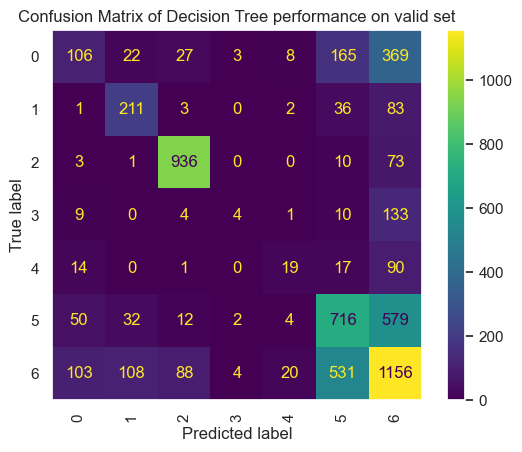

In [18]:
sns.set(style="dark") # drop the grid
predictions = gbt_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree performance on valid set")
plt.xticks(rotation=90)
plt.show();

In [19]:
submission_df = pd.read_csv('D:\\edge\\sample_submission.csv')
#submission_df=pd.DataFrame()

In [20]:
pred_proba = gbt_clf.predict_proba(test_data)

In [21]:
submission_df[target_variables] = pred_proba

In [22]:
submission_df.to_csv("submission.csv", index=False)